In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import statsmodels.api as sm
from sklearn import metrics
from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [3]:
df1 = pd.read_csv('Bankloan.csv')

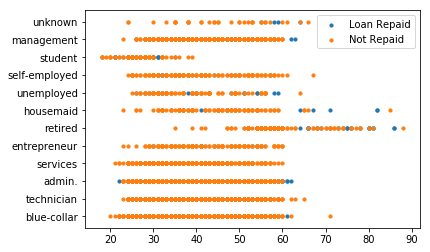

In [4]:
X = df1.iloc[:, :-1]
y = df1.iloc[:, -1]
repay = df1.loc[y == 'yes']
n_repay = df1.loc[y == 'no']

plt.scatter(repay.iloc[:, 0], repay.iloc[:, 1], s=10, label='Loan Repaid')
plt.scatter(n_repay.iloc[:, 0], n_repay.iloc[:, 1], s=10, label='Not Repaid')
plt.legend()
plt.show()

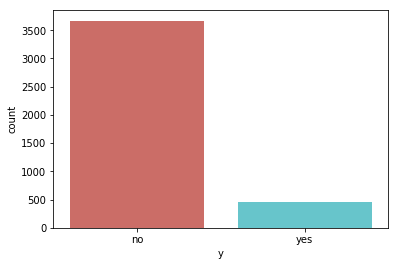

In [5]:
df1['y'].value_counts()
sns.countplot(x='y',data=df1,palette='hls')
plt.show() #Representing the Target column for binary classification

In [6]:
le = preprocessing.LabelEncoder()
df2 = df1.copy(deep = True)
df3 = df1.copy(deep = True)
for column in df2.columns:
    if df2[column].dtype == type(object):
        le = preprocessing.LabelEncoder()
        df2[column] = le.fit_transform(df2[column])
#print(df2)
#df3.apply(le.fit_transform)

In [7]:
X1 = df2.iloc[:, :-1]
y1 = df2.iloc[:, -1]

In [8]:
X_train,X_test,y_train,y_test=train_test_split(X1,y1,test_size=0.25,random_state=0)

In [9]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)

/home/abhishek/.local/lib/python2.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [10]:
cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_matrix

array([[895,  34],
       [ 65,  36]])

Text(0.5,257.44,'Predicted label')

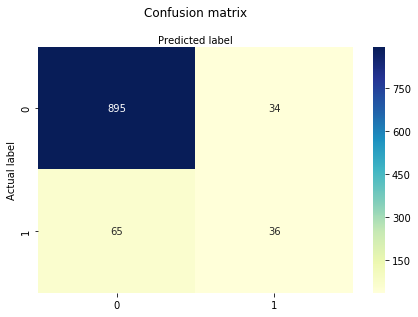

In [11]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()  
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [12]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

('Accuracy:', 0.903883495145631)
('Precision:', 0.5142857142857142)
('Recall:', 0.3564356435643564)
